# Importing Libraries and Load Dataset :

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
script_dir = os.getcwd()  # gives the C:\Users\ammmm\ to skip the unicodeescape error
file = 'Desktop\\hotel_bookings.csv' # the rest of the path
df = pd.read_csv(os.path.normcase(os.path.join(script_dir, file)))

In [3]:
df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

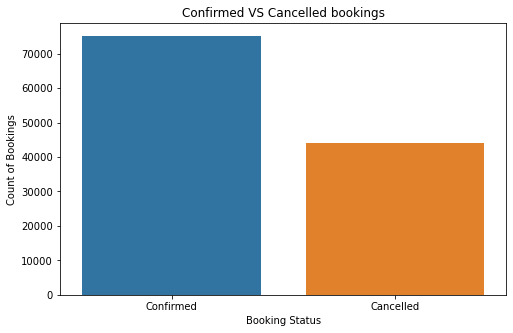

In [5]:
plt.figure(figsize=(8,5)) 
plt.title("Confirmed VS Cancelled bookings")

x= np.array([0,1])
y=df['is_canceled'].value_counts()
sns.barplot(x=x, y=y)

plt.xlabel("Booking Status" ) 
plt.ylabel("Count of Bookings")

plt.xticks(ticks=[0,1], labels=['Confirmed', 'Cancelled']); 

# Data Prepration :

## missing data handling

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df.children.fillna(0 , inplace=True )

df.agent.fillna(0 , inplace=True )

print( df.country.value_counts() )
df.country.fillna('PRT', inplace=True )

df = df.drop('company', axis = 1)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BWA        1
BDI        1
NIC        1
MMR        1
PYF        1
Name: country, Length: 177, dtype: int64


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## data types correction

In [10]:
df['children'] = df['children'].astype(int)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

## categorical data encoding 

In [11]:
categorical_features = df.select_dtypes(object).columns
cat_list = df[categorical_features]
cat_list.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [12]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_list:
    df[col] = le.fit_transform(df[col])
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,0.0,0,2,0.0,0,0,1,2015-07-01
1,1,0,737,2015,5,27,1,0,0,2,...,4,0,0.0,0,2,0.0,0,0,1,2015-07-01
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,0.0,0,2,75.0,0,0,1,2015-07-02
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.0,0,2,75.0,0,0,1,2015-07-02
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.0,0,2,98.0,0,1,1,2015-07-03


# Train & Test Splitting

In [13]:
df.drop(['reservation_status','agent','adr','reservation_status_date'] , axis = 1, inplace = True)

In [16]:
X = df.drop(columns = ['is_canceled'], axis=1)
y = df['is_canceled']
                             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature Scaling

In [17]:
# normalization of independant variales 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models Training & Evaluation

## Logistic Regression

Accuracy Score: 0.7948320629868498
Confusion Matrix:
 [[13814  1275]
 [ 3624  5165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85     15089
           1       0.80      0.59      0.68      8789

    accuracy                           0.79     23878
   macro avg       0.80      0.75      0.76     23878
weighted avg       0.80      0.79      0.79     23878



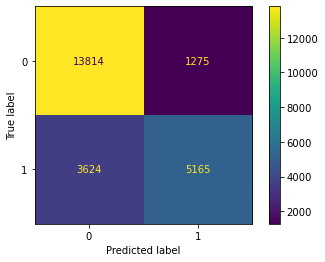

In [18]:
# model 1
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)

LR_y_pred = LR.predict(X_test)

# model 1 evaluation
LR_acc = accuracy_score(y_test, LR_y_pred)
LR_conf = confusion_matrix(y_test,LR_y_pred)
LR_clf_report = classification_report(y_test, LR_y_pred)
print("Accuracy Score:", LR_acc)
print("Confusion Matrix:\n",LR_conf)
print("Classification Report:\n",LR_clf_report)
print(plot_confusion_matrix(LR, X_test, y_test))

## Decision Tree Classifier

Accuracy Score: 0.8432029483206299
Confusion Matrix:
 [[13156  1933]
 [ 1811  6978]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88     15089
           1       0.78      0.79      0.79      8789

    accuracy                           0.84     23878
   macro avg       0.83      0.83      0.83     23878
weighted avg       0.84      0.84      0.84     23878



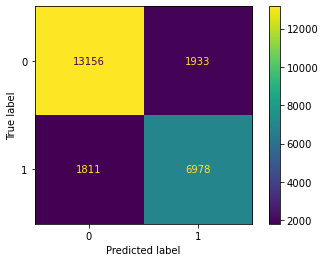

In [19]:
# model 2
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DTC_y_pred = DTC.predict(X_test)

# model 2 evaluation
DTC_acc = accuracy_score(y_test, DTC_y_pred)
DTC_conf = confusion_matrix(y_test, DTC_y_pred)
CTC_clf_report = classification_report(y_test, DTC_y_pred)
print("Accuracy Score:", DTC_acc)
print("Confusion Matrix:\n",DTC_conf)
print("Classification Report:\n",CTC_clf_report)
print(plot_confusion_matrix(DTC, X_test, y_test))

## Random Forest Classifier

Accuracy Score: 0.8870508417790435
Confusion Matrix:
 [[14115   974]
 [ 1723  7066]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     15089
           1       0.88      0.80      0.84      8789

    accuracy                           0.89     23878
   macro avg       0.89      0.87      0.88     23878
weighted avg       0.89      0.89      0.89     23878



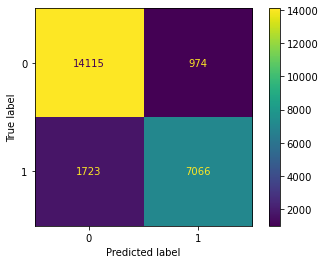

In [20]:
# model 3
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RFC_y_pred = RFC.predict(X_test)

# model 3 valuation
RFC_acc = accuracy_score(y_test, RFC_y_pred)
RFC_conf = confusion_matrix(y_test, RFC_y_pred)
RFC_clf_report = classification_report(y_test, RFC_y_pred)
print("Accuracy Score:", RFC_acc)
print("Confusion Matrix:\n",RFC_conf)
print("Classification Report:\n",RFC_clf_report)
print(plot_confusion_matrix(RFC, X_test, y_test))

# Correlations 

<AxesSubplot:title={'center':'Correlations'}>

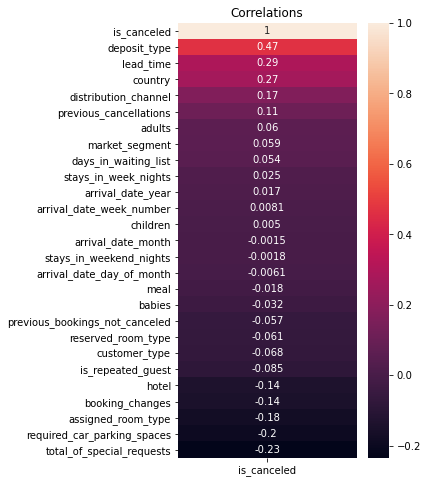

In [21]:
fig = plt.figure(figsize=(4,8))
plt.title('Correlations')
sns.heatmap(df.corr()[['is_canceled']].sort_values('is_canceled', ascending=False),annot = True)